In [1]:
from IPython.core.debugger import set_trace

import os
import sys
import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder    #tranforma variables categoricas a numericas
from sklearn.preprocessing import StandardScaler  # Escala los datos
from sklearn.ensemble import IsolationForest      # Algoritmo de recorte
from sklearn.decomposition import PCA             # Reduccion de dimensionalidad
from sklearn.model_selection import train_test_split  # divide de manera aleatoria en sub conjuntos de datos de prueba y entrenamiento
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.metrics import confusion_matrix      # genera la matriz de confusion
from sklearn.preprocessing import LabelEncoder    #tranforma variables categoricas a numericas
from sklearn.preprocessing import StandardScaler  # Escala los datos
from numpy import linalg as LA
from sklearn.ensemble import IsolationForest
import pickle

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
path = 'C:\\Users\\josrenca\\Desktop\\Universidad\\Datos PI - ARI\\'
archivo = 'cleanedVariables-standarized-respuestaBinaria.pkl'
rutaArchivo = path + archivo
df = pd.read_pickle(rutaArchivo)

In [3]:
df.shape

(3027853, 36)

In [4]:
df.columns

Index(['Amenity', 'Astronomical_Twilight', 'Bump', 'City', 'Civil_Twilight',
       'County', 'Crossing', 'Give_Way', 'Hour', 'Junction',
       'Nautical_Twilight', 'No_Exit', 'Railway', 'Roundabout', 'Severity',
       'Start_Lat', 'Start_Lng', 'State', 'Station', 'Stop', 'Street',
       'Sunrise_Sunset', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Weather_Condition', 'Wind_Direction', 'dayOfWeek', 'month',
       'newSeverity', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Description'],
      dtype='object')

In [6]:
numericData_lst = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']

C:\Users\josrenca\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


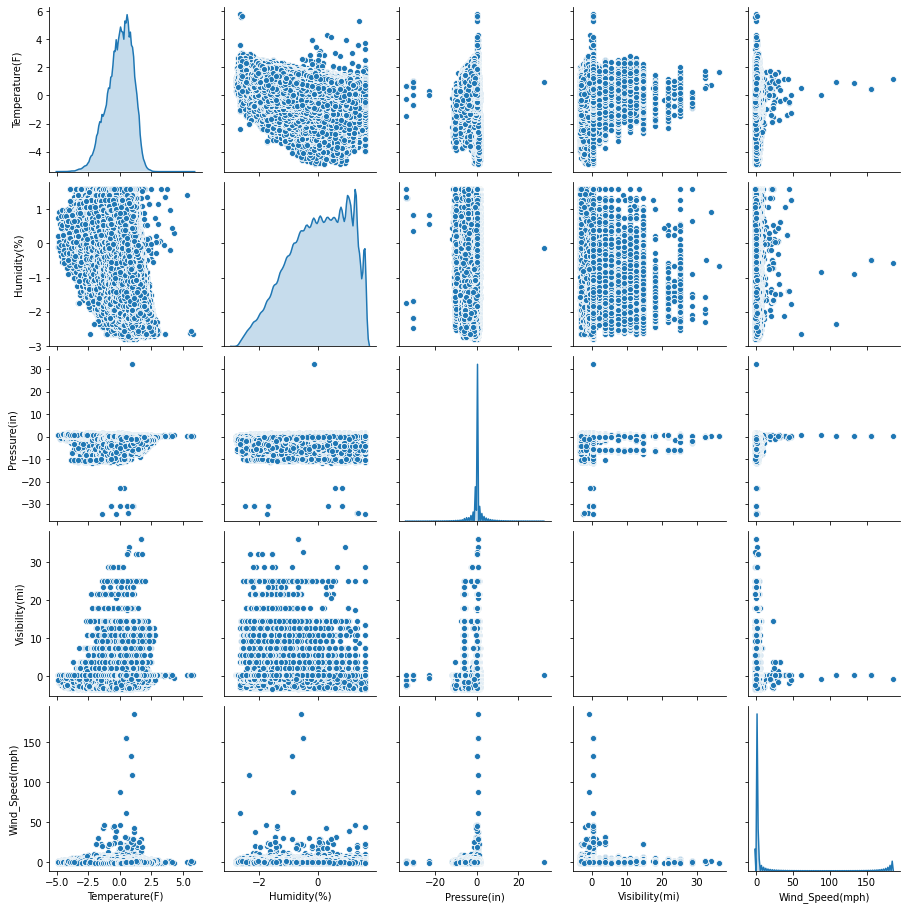

In [6]:
sns.pairplot(df[numericData_lst], diag_kind="kde")
plt.show()

In [7]:
df[numericData_lst].cov()

,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
Temperature(F),1.000000,-0.338633,-0.002526,0.192199,-0.005906
Humidity(%),-0.338633,1.000000,0.102127,-0.387426,-0.146016
Pressure(in),-0.002526,0.102127,1.000000,-0.010034,0.000753
Visibility(mi),0.192199,-0.387426,-0.010034,1.000000,0.015471
Wind_Speed(mph),-0.005906,-0.146016,0.000753,0.015471,1.000000


In [8]:
LA.cond(df[numericData_lst].cov().to_numpy())

3.0752258984767886

In [7]:
newSeverity =  df['newSeverity']
Severity = df['Severity']

In [8]:
df = df[df.columns.difference(['newSeverity','Severity'])]

In [9]:
df.columns

Index(['Amenity', 'Astronomical_Twilight', 'Bump', 'City', 'Civil_Twilight',
       'County', 'Crossing', 'Description', 'Give_Way', 'Hour', 'Humidity(%)',
       'Junction', 'Nautical_Twilight', 'No_Exit', 'Pressure(in)', 'Railway',
       'Roundabout', 'Start_Lat', 'Start_Lng', 'State', 'Station', 'Stop',
       'Street', 'Sunrise_Sunset', 'Temperature(F)', 'Traffic_Calming',
       'Traffic_Signal', 'Turning_Loop', 'Visibility(mi)', 'Weather_Condition',
       'Wind_Direction', 'Wind_Speed(mph)', 'dayOfWeek', 'month'],
      dtype='object')

In [10]:
df.head()

,Amenity,Astronomical_Twilight,Bump,City,Civil_Twilight,County,Crossing,Description,Give_Way,Hour,...,Temperature(F),Traffic_Calming,Traffic_Signal,Turning_Loop,Visibility(mi),Weather_Condition,Wind_Direction,Wind_Speed(mph),dayOfWeek,month
0,0,0,0,11194,1,317,0,Accident on OH-32 State Route 32 Westbound at ...,0,6,...,-1.413528,0,1,0,0.298707,77,15,-0.899846,0,2
1,0,0,0,2467,0,1037,0,Accident on I-75 Southbound at Exits 52 52B US...,0,7,...,-1.461671,0,0,0,-0.056635,74,15,-0.690152,0,2
2,0,0,0,2467,0,1037,0,Accident on McEwen Rd at OH-725 Miamisburg Cen...,0,7,...,-1.413528,0,1,0,-1.122663,74,15,-0.899846,0,2
3,0,0,0,11058,0,545,0,Accident on I-270 Outerbelt Northbound near Ex...,0,7,...,-1.311892,0,0,0,-0.767321,54,14,-0.899846,0,2
4,0,0,0,2467,0,1037,0,Accident on Oakridge Dr at Woodward Ave. Expec...,0,7,...,-1.520513,0,0,0,-0.767321,77,21,-0.899846,0,2


In [11]:
df.shape

(3027853, 34)

In [12]:
Severity.value_counts()

0    2086709
1     941144
Name: Severity, dtype: int64

In [13]:
newSeverity.value_counts()

1    1659499
0    1368354
Name: newSeverity, dtype: int64

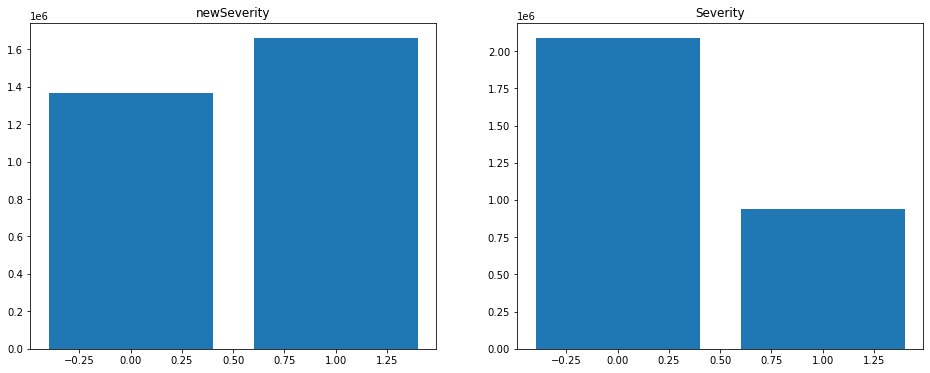

In [14]:
x = newSeverity.value_counts().index
y = newSeverity.value_counts().values

f = plt.figure(1, figsize=(16, 6))
ax1 = f.add_subplot(1, 2, 1)
ax1.title.set_text("newSeverity")
_ = ax1.bar(x, y)

x = Severity.value_counts().index
y = Severity.value_counts().values

f = plt.figure(1, figsize=(16, 6))
ax2 = f.add_subplot(1, 2, 2)
ax2.title.set_text("Severity")
_ = ax2.bar(x, y)

In [15]:
import time

def isolationForestModeling(dfOriginal, variableObjetivo, contInicial, rango, numModelos):
    
    print("Preparando los datos...")
    
    dfOriginal = pd.concat([dfOriginal.reset_index(drop=True),variableObjetivo.reset_index(drop=True)], join="outer",axis=1)
    dfCopy = dfOriginal.copy()[dfOriginal.columns.difference(['Description'])].reset_index(drop=True)
    numsCond = []
    tiemposRecorte = []
    nombreVariableObj = variableObjetivo.name
    contaminacionVec = []
    
    numCondActual = LA.cond(dfCopy[numericData_lst].cov().to_numpy())
    
    tiemposRecorte.append(0)
    numsCond.append(numCondActual)
    contaminacionVec.append(0)
    
    print("Dimensiones matriz Original: " + str(dfOriginal.shape))
    print("Dimensiones matriz Copia: " + str(dfCopy.shape))
    
    contaminacion = contInicial
    for i in range(1,numModelos+1):
        
        start_time = time.time()
        
        print("\n<<<<<<<<<<<<<<<<<<<<<<<< Modelo: " + str(i) + " >>>>>>>>>>>>>>>>>>>>>>>>")
        print("Contaminacion: " + str(contaminacion))
        
        model = IsolationForest(contamination=contaminacion)
        model.fit(dfCopy.values)
        
        archivoModelo = "cleanedModel-IF-" + str(contaminacion) + "p-" + nombreVariableObj +".pkl"
        rutaArchivo = path + "ModeloRecorteIFBinaria\\" + archivoModelo  
        modelfile = open(rutaArchivo, "wb")
        pickle.dump(model, modelfile)
        modelfile.close()
        
        dfOriginal["iforest"] = pd.Series(model.predict(dfCopy.values))
        print(dfOriginal["iforest"].value_counts())
        dfCopy = dfOriginal[dfOriginal["iforest"] != -1]
        dfOriginal = dfOriginal.drop('iforest', axis=1)
        dfCopy = dfCopy.drop('iforest', axis=1)
        
        archivoDatos = "cleanedData-IF-" + str(contaminacion) + "p-" + nombreVariableObj +".pkl"
        rutaArchivo = path + "DatosRecorteIFBinaria\\" + archivoDatos  
        dfCopy.reset_index(drop=True).to_pickle(rutaArchivo)
        
        numCondActual = LA.cond(dfCopy[numericData_lst].cov().to_numpy())
        tiempoEjecucion = time.time() - start_time
        
        print("Nombre Modelo: " + archivoModelo)
        print("Nombre Dataset Limpio: " + archivoDatos + " | Dimensiones : " + str(dfCopy.shape))
        print("Numero condicion actual: " + str(numCondActual))
        print("-------- %s segundos --------" % (tiempoEjecucion))
        
        dfCopy = dfOriginal.copy()[dfOriginal.columns.difference(['Description'])]
        
        tiemposRecorte.append(tiempoEjecucion)
        numsCond.append(numCondActual)
        contaminacionVec.append(contaminacion)
        
        if i == 1 and contaminacion == 0.01:
            contaminacion = 0
        
        contaminacion=round(round(contaminacion,2)+round(rango,2),2)
        
    return contaminacionVec, tiemposRecorte, numsCond

In [16]:
%%time
contaminacionVec, tiemposRecorte, numsCond = isolationForestModeling(df,Severity,0.05, 0.05, 9)

Preparando los datos...
Dimensiones matriz Original: (3027853, 35)
Dimensiones matriz Copia: (3027853, 34)

<<<<<<<<<<<<<<<<<<<<<<<< Modelo: 1 >>>>>>>>>>>>>>>>>>>>>>>>
Contaminacion: 0.05
 1    2876460
-1     151393
Name: iforest, dtype: int64
Nombre Modelo: cleanedModel-IF-0.05p-Severity.pkl
Nombre Dataset Limpio: cleanedData-IF-0.05p-Severity.pkl | Dimensiones : (2876460, 35)
Numero condicion actual: 3.002452455492446
-------- 537.6466467380524 segundos --------

<<<<<<<<<<<<<<<<<<<<<<<< Modelo: 2 >>>>>>>>>>>>>>>>>>>>>>>>
Contaminacion: 0.1
 1    2725067
-1     302786
Name: iforest, dtype: int64
Nombre Modelo: cleanedModel-IF-0.1p-Severity.pkl
Nombre Dataset Limpio: cleanedData-IF-0.1p-Severity.pkl | Dimensiones : (2725067, 35)
Numero condicion actual: 2.9562291658221826
-------- 530.7989337444305 segundos --------

<<<<<<<<<<<<<<<<<<<<<<<< Modelo: 3 >>>>>>>>>>>>>>>>>>>>>>>>
Contaminacion: 0.15
 1    2573675
-1     454178
Name: iforest, dtype: int64
Nombre Modelo: cleanedModel-IF-0.1

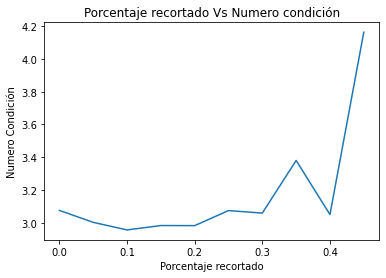

In [17]:
plt.title("Porcentaje recortado Vs Numero condición")
plt.ylabel("Numero Condición")
plt.xlabel("Porcentaje recortado")
plt.plot(contaminacionVec,numsCond)

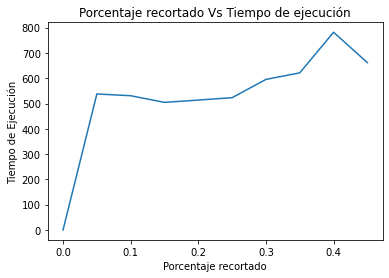

In [18]:
plt.title("Porcentaje recortado Vs Tiempo de ejecución")
plt.ylabel("Tiempo de Ejecución")
plt.xlabel("Porcentaje recortado")
plt.plot(contaminacionVec,tiemposRecorte)